In [1]:
from scipy.io import loadmat
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# data = loadmat('data/burgers_data_R10.mat')
data = loadmat('data/burgers_data_R10.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'a', 'a_smooth', 'a_smooth_x', 'a_x', 'u'])

In [4]:
for key, value in data.items():
    if isinstance(value, np.ndarray):  # Check if the variable is an array
        print(f"Variable '{key}': Shape = {value.shape}")
    else:
        print(f"Variable '{key}' is not an array; shape is not applicable")


Variable '__header__' is not an array; shape is not applicable
Variable '__version__' is not an array; shape is not applicable
Variable '__globals__' is not an array; shape is not applicable
Variable 'a': Shape = (2048, 8192)
Variable 'a_smooth': Shape = (2048, 8192)
Variable 'a_smooth_x': Shape = (2048, 8191)
Variable 'a_x': Shape = (2048, 8191)
Variable 'u': Shape = (2048, 8192)


In [10]:
data['a'][0:5, :5]

array([[ 0.83541104,  0.83534205,  0.83527089,  0.83519758,  0.8351221 ],
       [ 0.47407753,  0.47384712,  0.47361934,  0.47339421,  0.47317171],
       [-0.38015728, -0.38074248, -0.38132998, -0.38191974, -0.3825117 ],
       [-0.44652176, -0.44622018, -0.44591411, -0.44560351, -0.44528837],
       [ 0.00402526,  0.0044145 ,  0.00480531,  0.0051977 ,  0.00559168]])

In [12]:
data['u'][-1, :5]

array([1.03637159, 1.03680505, 1.03723843, 1.0376717 , 1.03810489])

In [10]:
tensor = torch.from_numpy(data['a'][0, ::100])
signal = torch.fft.fft(tensor)
magnitude = torch.abs(signal)

In [11]:
signal

tensor([-7.1364e-14+0.0000e+00j, -4.8817e-14-9.3117e-15j,
        -4.3475e-14-5.0380e-15j, -5.6423e-14-2.6836e-14j,
        -5.2207e-14-3.9749e-15j, -6.4019e-14-2.6131e-14j,
        -5.2135e-14-3.1321e-14j, -6.0398e-14-1.9389e-14j,
         4.3848e-15-5.4100e-14j, -7.8953e-14+3.1331e-14j,
        -1.1391e-13-9.9549e-14j,  5.0466e-14-6.8162e-14j,
        -7.9171e-14-5.9356e-15j,  1.4367e-13+6.4063e-15j,
        -6.0008e-14+1.0883e-13j, -2.6438e-14-1.0613e-13j,
        -1.3612e-13+1.6550e-13j, -1.3805e-13-4.1149e-14j,
        -1.8048e-13-9.2616e-14j, -6.3352e-14+2.8584e-14j,
        -1.0709e-13-3.2656e-13j,  1.1114e-14-6.8916e-14j,
        -3.3716e-14-2.1660e-13j,  6.3532e-14-8.5713e-14j,
         5.4460e-14-7.1089e-14j,  2.7267e-14-7.2060e-14j,
        -2.4779e-14-8.8900e-14j,  4.5400e-14-1.3535e-13j,
         7.8073e-14-9.4204e-14j,  6.7004e-14-1.0003e-13j,
         9.0370e-14-8.2581e-14j,  7.4944e-14-7.0707e-14j,
         1.0596e-13-5.1529e-14j,  8.8824e-14-1.7514e-14j,
         7.416

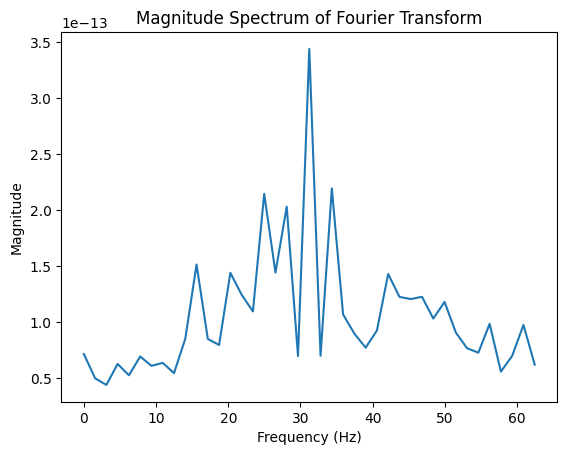

In [ ]:
# Define frequency axis for plotting
n = signal.size(0)
freqs = np.fft.fftfreq(n, d=1/128)[:n // 2]  # Adjust `d` based on sampling rate

# Plot the magnitude spectrum
plt.plot(freqs, magnitude[:n // 2].numpy())  # Convert to NumPy for matplotlib
plt.title("Magnitude Spectrum of Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()